# Multiple regression model

This example generates synthetic data for advertising spend, number of salespeople, and sales. It then performs multiple linear regression analysis using the `Advertising_Spend` and `Num_Salespeople` as independent variables to predict `Sales`. The code also includes visualization to compare actual vs. predicted sales.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [29]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 200
advertising_spend = np.random.uniform(50, 200, num_samples)
num_salespeople = np.random.randint(3, 10, num_samples)
error_term = np.random.normal(0, 20, num_samples)

sales = 50 + 2 * advertising_spend + 5 * num_salespeople + error_term

In [30]:
# Create a DataFrame
df = pd.DataFrame({'Advertising_Spend': advertising_spend, 'Num_Salespeople': num_salespeople, 'Sales': sales})
df.head()

,Advertising_Spend,Num_Salespeople,Sales
0,106.181018,6,282.863129
1,192.607146,5,447.147707
2,159.799091,3,419.907267
3,139.798773,6,367.697179
4,73.402796,8,211.587913


In [31]:
df.shape

(200, 3)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


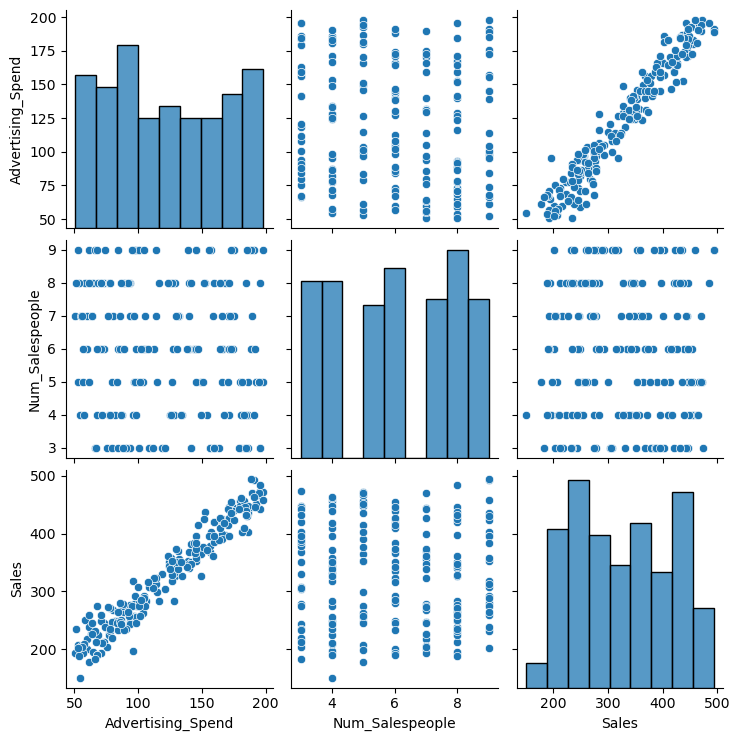

In [32]:
sns.pairplot(df)

In [33]:
df.corr()

,Advertising_Spend,Num_Salespeople,Sales
Advertising_Spend,1.000000,-0.158467,0.970023
Num_Salespeople,-0.158467,1.000000,-0.058324
Sales,0.970023,-0.058324,1.000000


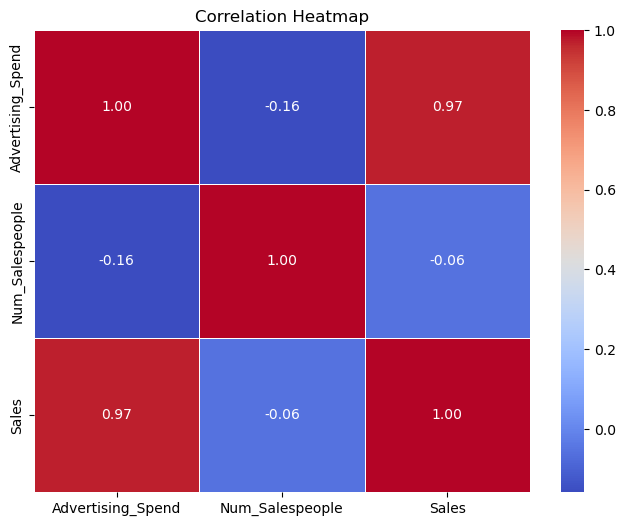

In [34]:
# Assuming df is your DataFrame containing the data
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Using OLS method

In [9]:
# Multiple Linear Regression
X = sm.add_constant(df[['Advertising_Spend', 'Num_Salespeople']])
y = df['Sales']

In [11]:
# Fit the model
model = sm.OLS(y, X).fit()

In [12]:
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1883.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          4.07e-129
Time:                        09:35:00   Log-Likelihood:                -878.08
No. Observations:                 200   AIC:                             1762.
Df Residuals:                     197   BIC:                             1772.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                60.7880      6.36

In [22]:
# Add constant term to new data
new_data = pd.DataFrame({'Advertising_Spend': [150], 'Num_Salespeople': [6]})
new_data = sm.add_constant(new_data)

In [25]:
# Make predictions for new data
prediction = model.predict(new_data)

ValueError: shapes (1,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

C:\Users\hp\AppData\Local\Temp\ipykernel_27668\3524736740.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2, color='r')


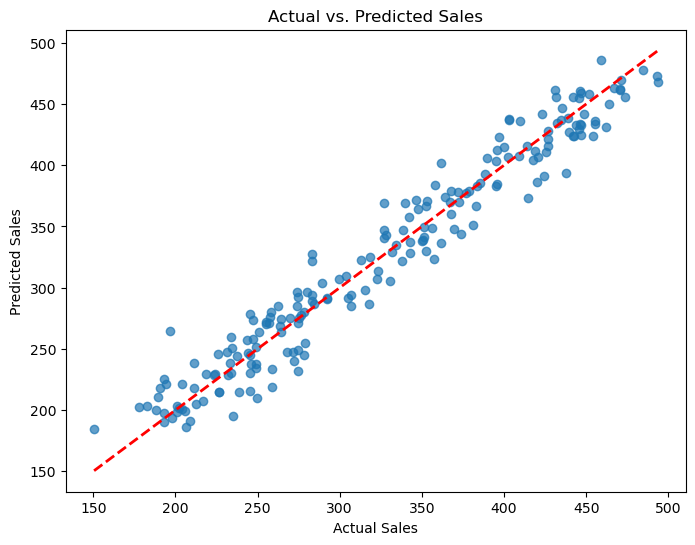

In [24]:
# Visualize the results
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of actual vs. predicted sales
ax.scatter(y, model.predict(X), alpha=0.7)
ax.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2, color='r')
ax.set_xlabel('Actual Sales')
ax.set_ylabel('Predicted Sales')
ax.set_title('Actual vs. Predicted Sales')

plt.show()